# Importanto base de dados

In [1]:
import pandas as pd

In [2]:
pd.read_csv("tips.csv")

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [3]:
dados = pd.read_csv("tips.csv")

In [4]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Traduzindo os dados

In [5]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [6]:
renomear = {
    'total_bill': "valor_da_conta", 
    'tip': "gorjeta",
    'dessert': "sobremesa", 
    'day': "dia_da_semana", 
    'time': "hora_do_dia", 
    'size': "total_de_pessoas"
}

In [7]:
gorjetas = dados.rename(columns = renomear)

In [8]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3


In [9]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
sim_nao = {
    'No': "Não", 
    'Yes': "Sim"
}

In [11]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [12]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3


In [13]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [14]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3


In [15]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [16]:
dias = {
    'Sun': "Domingo", 
    'Sat': "Sábado", 
    'Thur': "Quinta", 
    'Fri': "Sexta"
}

In [17]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [18]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [19]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [20]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [21]:
hora = {
    'Dinner': "Jantar", 
    'Lunch': "Almoço"
}

In [22]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [23]:
gorjetas.head(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
5,25.29,4.71,Não,Domingo,Jantar,4
6,8.77,2.00,Não,Domingo,Jantar,2
7,26.88,3.12,Não,Domingo,Jantar,4
8,15.04,1.96,Não,Domingo,Jantar,2
9,14.78,3.23,Não,Domingo,Jantar,2


# Importando o Seaborn

In [24]:
import seaborn as sns

In [25]:
!pip show seaborn

Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\user\anaconda3\envs\data_science\lib\site-packages
Requires: pandas, scipy, numpy, matplotlib
Required-by: 


# Análise 1 - Valor da conta e gorjeta

In [26]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

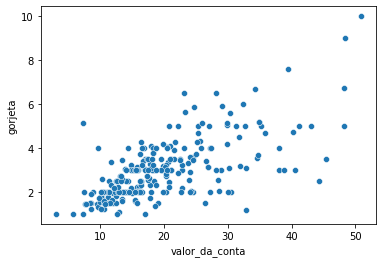

In [27]:
sns.scatterplot(x="valor_da_conta", y="gorjeta", data=gorjetas);

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [28]:
print("A base de dados contém {} registros".format( gorjetas.shape[0]))
print("Registros não nulos")
gorjetas.count()

A base de dados contém 244 registros
Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [29]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [30]:
gorjetas["porcentagem"] = gorjetas["gorjeta"] / gorjetas["valor_da_conta"]

In [31]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [32]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [33]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


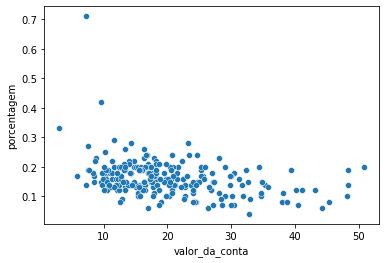

In [34]:
porcentagem_conta = sns.scatterplot(x="valor_da_conta", y="porcentagem", 
                                    data=gorjetas)

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

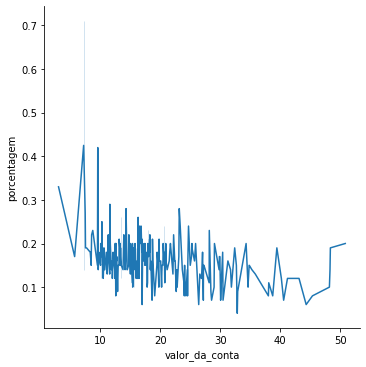

In [35]:
porcentagem_conta_linha = sns.relplot(x="valor_da_conta", y="porcentagem",
                                      kind="line", data=gorjetas)

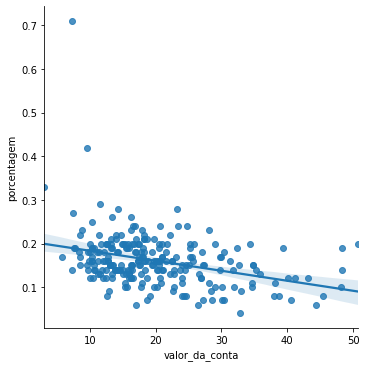

In [36]:
sns.lmplot(x="valor_da_conta", y="porcentagem", data=gorjetas);

# Análise 2 - Sobremesa

In [37]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [38]:
gorjetas[gorjetas.sobremesa == "Sim"].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [39]:
gorjetas[gorjetas.sobremesa == "Não"].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


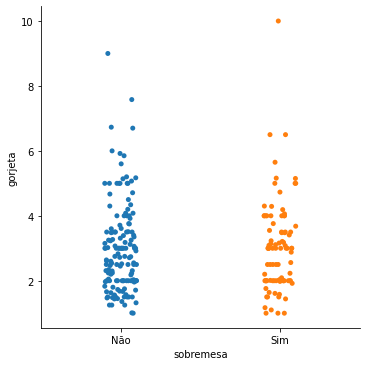

In [40]:
sns.catplot(x="sobremesa", y="gorjeta", data=gorjetas)

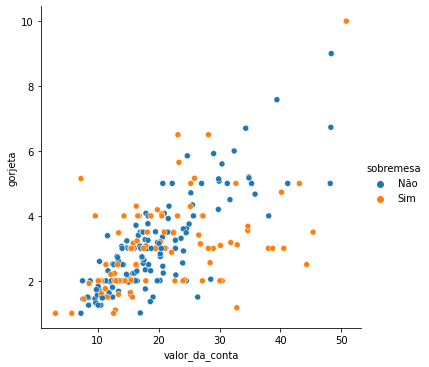

In [41]:
sns.relplot(x="valor_da_conta", y="gorjeta", hue="sobremesa", data=gorjetas)

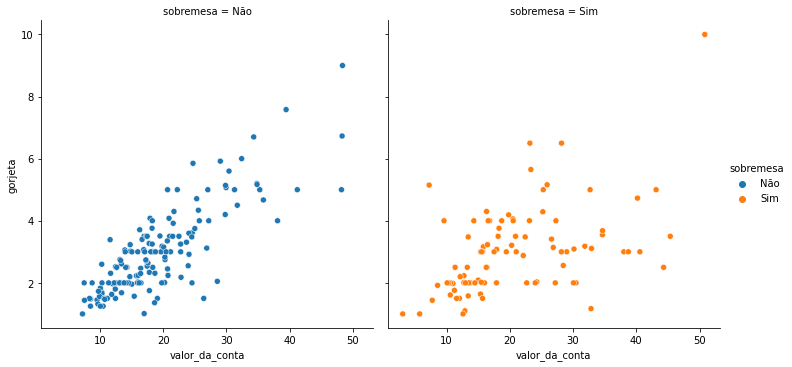

In [42]:
sns.relplot(x="valor_da_conta", y="gorjeta", hue="sobremesa", col="sobremesa", 
            data=gorjetas)

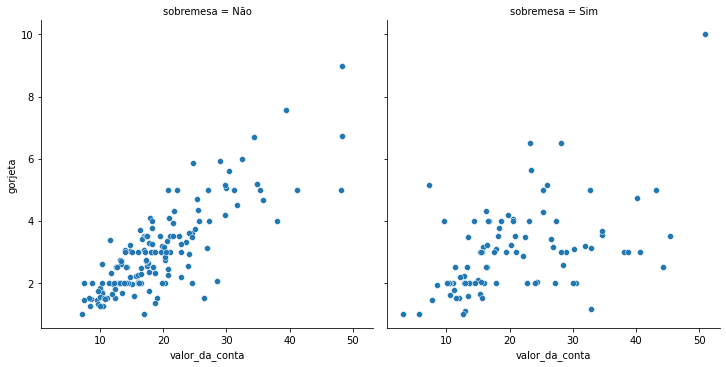

In [43]:
sns.relplot(x="valor_da_conta", y="gorjeta", col="sobremesa", 
            data=gorjetas)

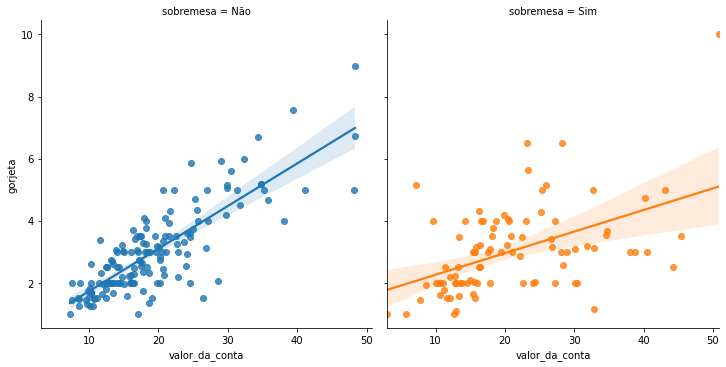

In [44]:
sns.lmplot(x="valor_da_conta", y="gorjeta", col="sobremesa", 
           hue="sobremesa", data=gorjetas)

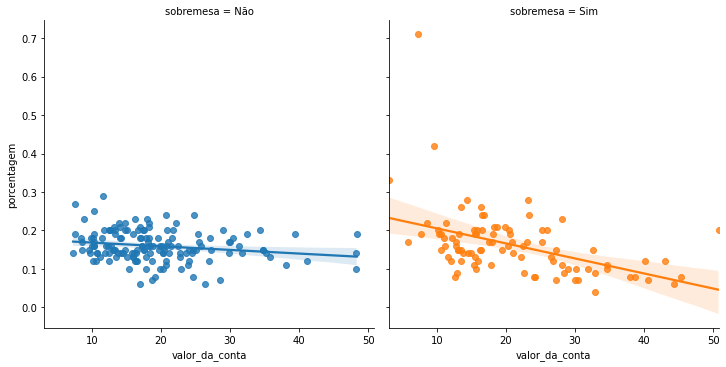

In [45]:
sns.lmplot(x="valor_da_conta", y="porcentagem", col="sobremesa", 
           hue="sobremesa", data=gorjetas)

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e aqueles que não pediram**

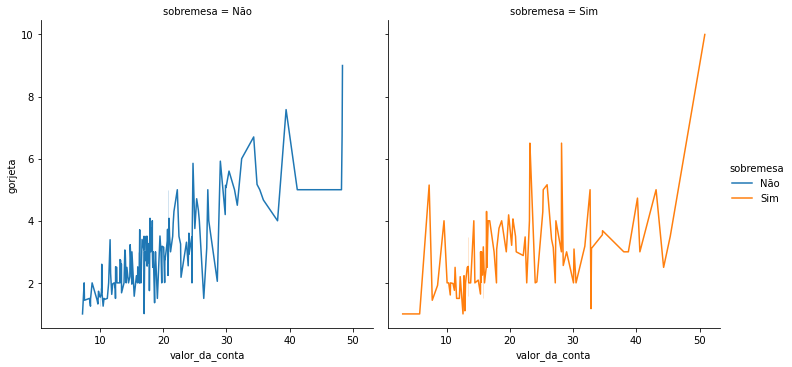

In [46]:
sns.relplot(x="valor_da_conta", y="gorjeta", col="sobremesa", hue="sobremesa",
            kind="line",
            data=gorjetas)

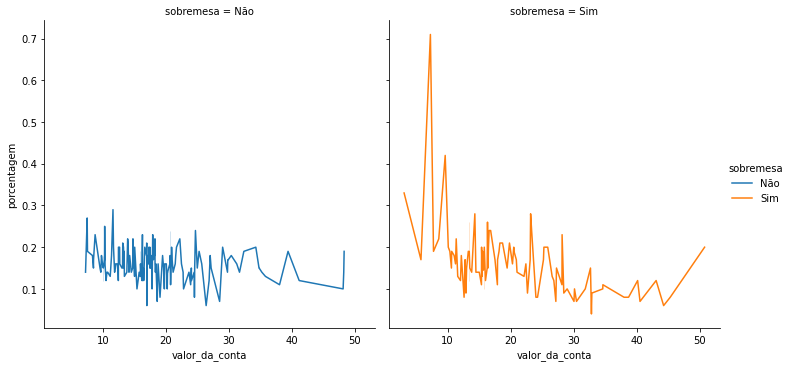

In [47]:
sns.relplot(x="valor_da_conta", y="porcentagem", col="sobremesa", hue="sobremesa",
            kind="line",
            data=gorjetas)

## Teste de hipótese

**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [48]:
from scipy.stats import ranksums

In [49]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [50]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [51]:
r = ranksums(sobremesa, sem_sobremesa)

In [52]:
print(f"O valor do p-value é {r.pvalue}")

O valor do p-value é 0.5266635660124415


**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Análise 3 - Dia da Semana

In [53]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [54]:
gorjetas["dia_da_semana"].unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

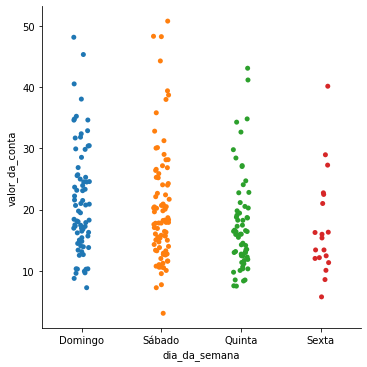

In [55]:
sns.catplot(x="dia_da_semana", y="valor_da_conta", data=gorjetas)

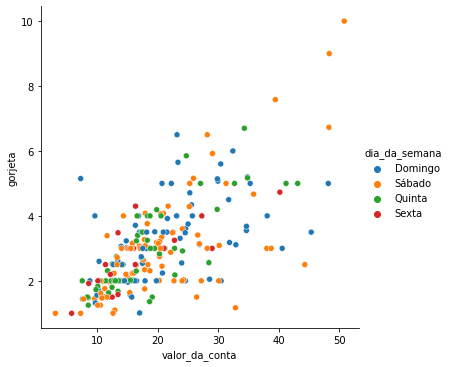

In [56]:
sns.relplot(x="valor_da_conta", 
            y="gorjeta", hue="dia_da_semana", data=gorjetas)

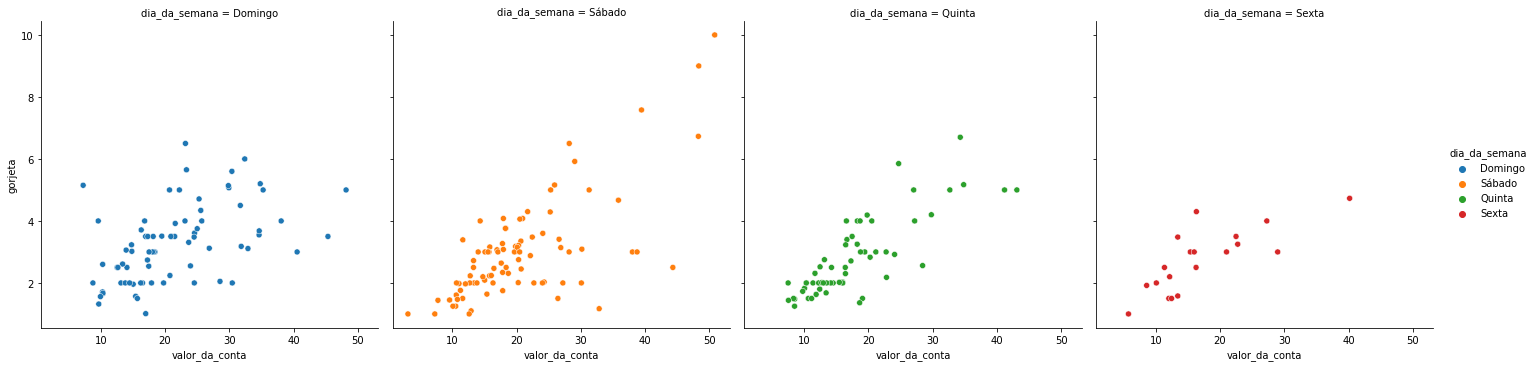

In [57]:
sns.relplot(x="valor_da_conta", y="gorjeta", hue="dia_da_semana", 
            col="dia_da_semana", data=gorjetas)

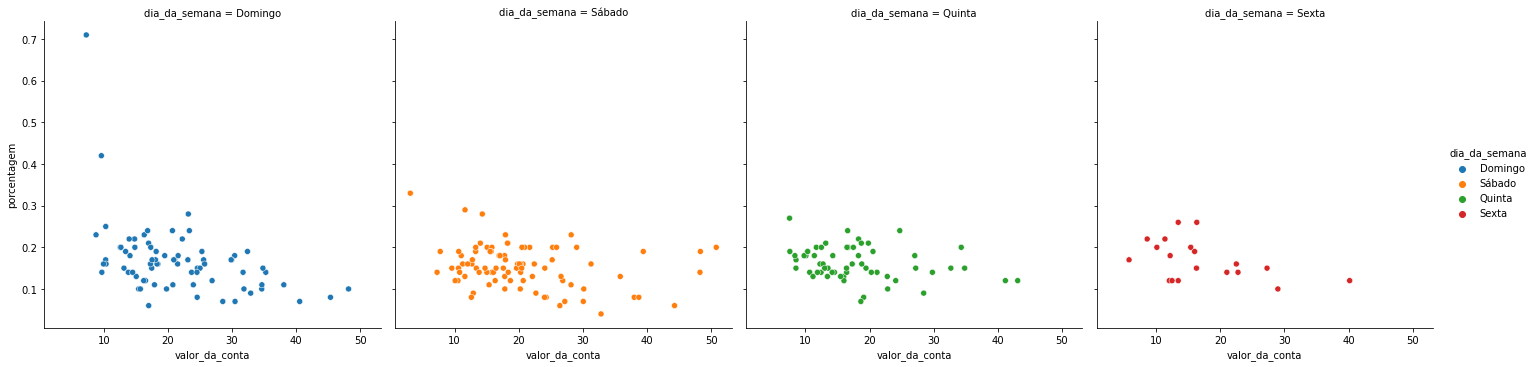

In [58]:
sns.relplot(x="valor_da_conta", y="porcentagem", hue="dia_da_semana", 
            col="dia_da_semana", data=gorjetas)

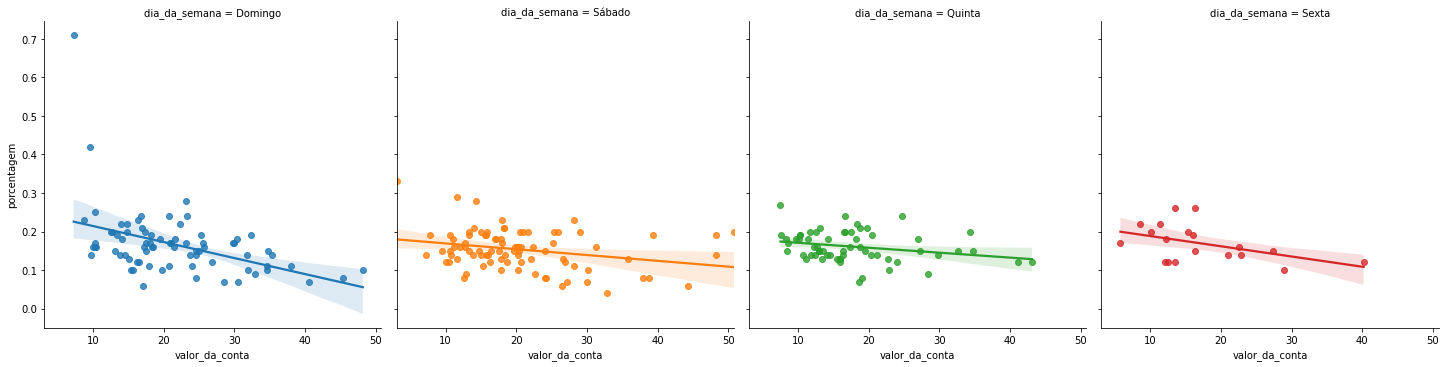

In [59]:
sns.lmplot(x="valor_da_conta", y="porcentagem", hue="dia_da_semana", 
            col="dia_da_semana", data=gorjetas)

In [60]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [61]:
print(f"A média geral das gorjetas é de { media_geral_gorjetas}")

A média geral das gorjetas é de 2.9982786885245902


In [62]:
gorjetas.groupby(["dia_da_semana"]).mean()[["valor_da_conta", 
                                           "gorjeta", "porcentagem"]]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [63]:
print("Frequência dos dias")
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no sábado e no domingo**

In [64]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'"
                                    ).valor_da_conta

In [65]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'"
                                    ).valor_da_conta

In [66]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f"O valor do p-value é {r2.pvalue}")

O valor do p-value é 0.3576728477868443


**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no sábado e no domingo**


# Análise 4 - Hora do dia

In [67]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

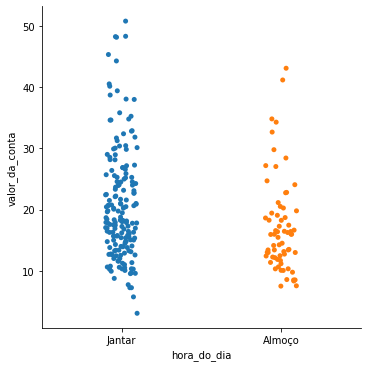

In [68]:
sns.catplot(x="hora_do_dia", y="valor_da_conta", data=gorjetas)

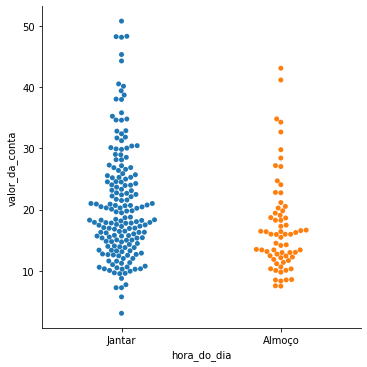

In [69]:
sns.catplot(x="hora_do_dia", y="valor_da_conta", 
            kind = "swarm", data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

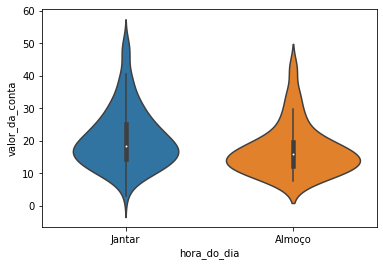

In [70]:
sns.violinplot(x="hora_do_dia", y="valor_da_conta", data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

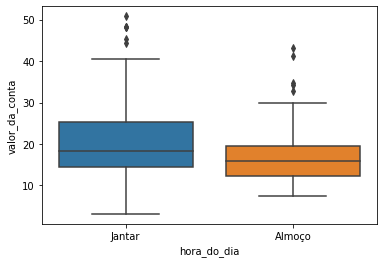

In [71]:
sns.boxplot(x="hora_do_dia", y="valor_da_conta", data=gorjetas)

In [72]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

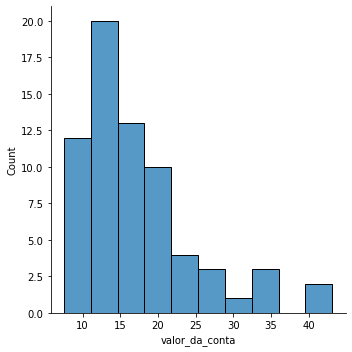

In [73]:
sns.displot(almoco)

In [74]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

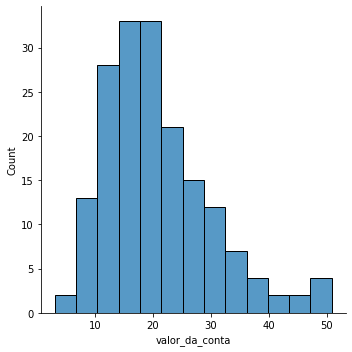

In [75]:
sns.displot(jantar)

In [76]:
gorjetas.groupby(["hora_do_dia"]).mean()[["valor_da_conta", 
                                        "gorjeta", "porcentagem"]]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese

**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no jantar e no almoço**

In [77]:
r3 = ranksums(jantar, almoco)

In [78]:
print(f"O valor do p-value é de {r3.pvalue}")

O valor do p-value é de 0.0011791039723641672


**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no jantar e no almoço**

## Teste de hipótese II

**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**

> **A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [79]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [80]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [81]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [82]:
print(f"O valor do p-value é de {r4.pvalue}")

O valor do p-value é de 0.2602493995587126


**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta da conta é igual no jantar e no almoço**
